<a href="https://colab.research.google.com/github/AndreaHernandez5072/CienciaDatos/blob/main/HT9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Andrea Marleny Hernández Contreras, 1203718

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix,r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
#svm -> suport virtual machine
from sklearn.svm import SVC,LinearSVC
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier

In [2]:
df = pd.read_csv("orange.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   241 non-null    int64  
 1   Size         241 non-null    float64
 2   Weight       241 non-null    int64  
 3   Brix         241 non-null    float64
 4   pH           241 non-null    float64
 5   Softness     241 non-null    float64
 6   HarvestTime  241 non-null    int64  
 7   Ripeness     241 non-null    float64
 8   Color        241 non-null    object 
 9   Variety      241 non-null    object 
 10  Blemishes    241 non-null    object 
 11  Quality      241 non-null    float64
dtypes: float64(6), int64(3), object(3)
memory usage: 22.7+ KB


In [3]:
df.isna().sum()

Unnamed: 0     0
Size           0
Weight         0
Brix           0
pH             0
Softness       0
HarvestTime    0
Ripeness       0
Color          0
Variety        0
Blemishes      0
Quality        0
dtype: int64

In [4]:
print("Colors: ",df["Color"].unique())
print("\nVariety:",df["Variety"].unique())
print("\nBlemishes",df["Blemishes"].unique())

Colors:  ['Orange' 'Deep Orange' 'Light Orange' 'Orange-Red' 'Yellow-Orange']

Variety: ['Valencia' 'Navel' 'Cara Cara' 'Blood Orange' 'Hamlin' 'Tangelo (Hybrid)'
 'Murcott (Hybrid)' 'Moro (Blood)' 'Jaffa' 'Clementine' 'Washington Navel'
 'Star Ruby' 'Tangerine' 'Ambiance' 'California Valencia'
 'Honey Tangerine' 'Navel (Late Season)' 'Clementine (Seedless)' 'Temple'
 'Minneola (Hybrid)' 'Satsuma Mandarin' 'Midsweet (Hybrid)'
 'Navel (Early Season)' 'Ortanique (Hybrid)']

Blemishes ['N' 'Y (Minor)' 'Y (Sunburn)' 'Y (Mold Spot)' 'Y (Bruise)'
 'Y (Split Skin)' 'Y (Sunburn Patch)' 'Y (Scars)'
 'Y (Minor Insect Damage)' 'Y (Bruising)' 'N (Minor)' 'N (Split Skin)']


In [5]:
cleanup={"Color":{"Orange":0,"Deep Orange":1,"Light Orange":2,"Orange-Red":3,"Yellow-Orange":4},
         "Variety":{"Valencia":0,"Navel":1,"Cara Cara":2,"Blood Orange":3,"Hamlin":4,"Tangelo (Hybrid)":5,"Murcott (Hybrid)":6,"Moro (Blood)":7,"Jaffa":8,
                    "Clementine":9,"Washington Navel":10,"Star Ruby":11,"Tangerine":12,"Ambiance":13,"California Valencia":14,"Honey Tangerine":15,"Navel (Late Season)":16,
                    "Clementine (Seedless)":17,"Temple":18,"Minneola (Hybrid)":19,"Satsuma Mandarin":20,"Midsweet (Hybrid)":21,"Navel (Early Season)":22,"Ortanique (Hybrid)":23},
         "Blemishes":{"N":0,"N (Minor)":1,"N (Split Skin)":2,"Y (Minor)":3,"Y (Sunburn)":4,"Y (Mold Spot)":5,"Y (Bruise)":6,"Y (Split Skin)":7,"Y (Sunburn Patch)":8,"Y (Scars)":9,
                      "Y (Minor Insect Damage)":10,"Y (Bruising)":11}}

df = df.replace(cleanup)
df.describe()

,Unnamed: 0,Size,Weight,Brix,pH,Softness,HarvestTime,Ripeness,Color,Variety,Blemishes,Quality
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,120.000000,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,1.676349,11.041494,2.742739,3.780083
std,69.714896,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.104452,6.864639,3.854678,1.023361
min,0.000000,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,60.000000,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,1.000000,7.000000,0.000000,3.000000
50%,120.000000,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,2.000000,11.000000,0.000000,4.000000
75%,180.000000,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,3.000000,18.000000,7.000000,4.000000
max,240.000000,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,4.000000,23.000000,11.000000,5.000000


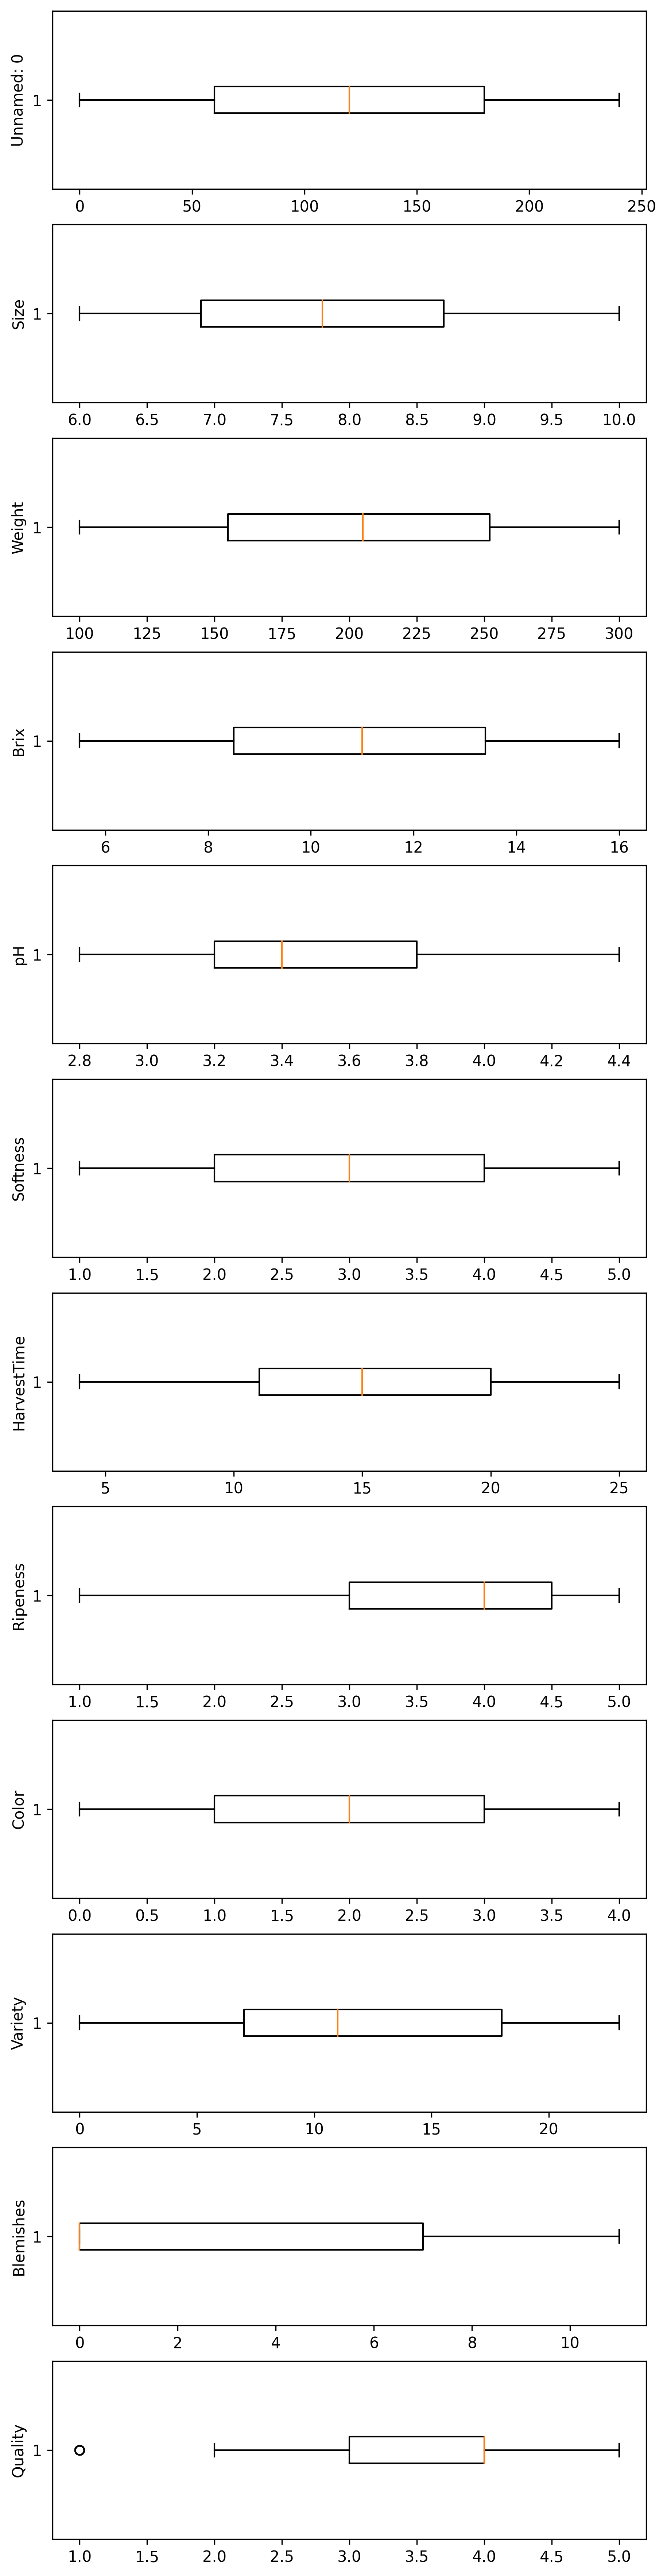

In [6]:
#Detección de Outliers
def mostrarOutliers(dataset):
  fig,axs= plt.subplots(12,1,dpi=300,figsize=(7,30))
  i = 0
  for col in dataset.columns:
    axs[i].boxplot(df[col],vert=False)
    axs[i].set_ylabel(col)
    i+=1
  plt.show()

mostrarOutliers(df)

Variables que necesitan tratamiento son: Quality

In [7]:
def TratamientoOutliers(col,dataset,cleandata):
  #calcular los cuartiles
  q1,q3=np.percentile(dataset[col],[25,75])
  #Calcular iqr
  iqr=q3-q1
  limite_inferior=q1-(1.5*iqr)
  limite_superior=q3+(1.5*iqr)
  #Similar a un IF
  dataset[col]=np.where(dataset[col]>limite_superior,limite_superior,np.where(dataset[col]<limite_inferior,limite_inferior,dataset[col]))

In [8]:
clean_data=df
TratamientoOutliers("Quality",clean_data,clean_data)
clean_data.describe()

,Unnamed: 0,Size,Weight,Brix,pH,Softness,HarvestTime,Ripeness,Color,Variety,Blemishes,Quality
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,120.000000,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,1.676349,11.041494,2.742739,3.798755
std,69.714896,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.104452,6.864639,3.854678,0.975725
min,0.000000,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.500000
25%,60.000000,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,1.000000,7.000000,0.000000,3.000000
50%,120.000000,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,2.000000,11.000000,0.000000,4.000000
75%,180.000000,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,3.000000,18.000000,7.000000,4.000000
max,240.000000,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,4.000000,23.000000,11.000000,5.000000


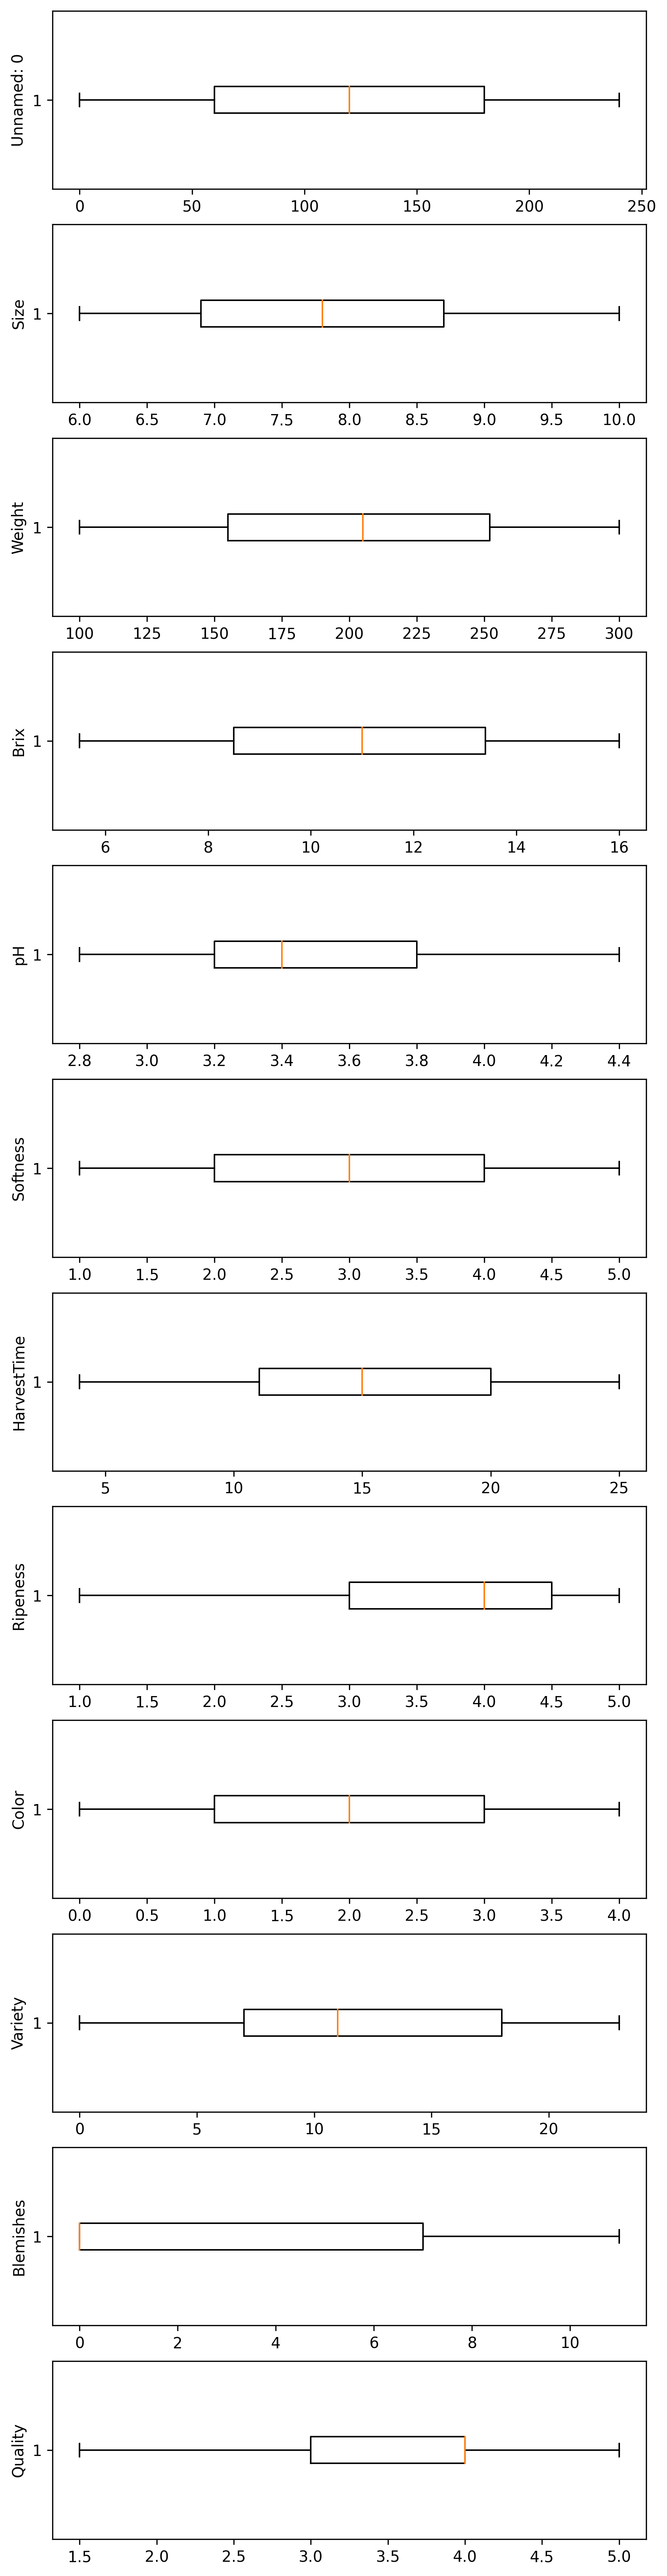

In [9]:
mostrarOutliers(df)

In [10]:
df.to_csv("out.csv",index=False)

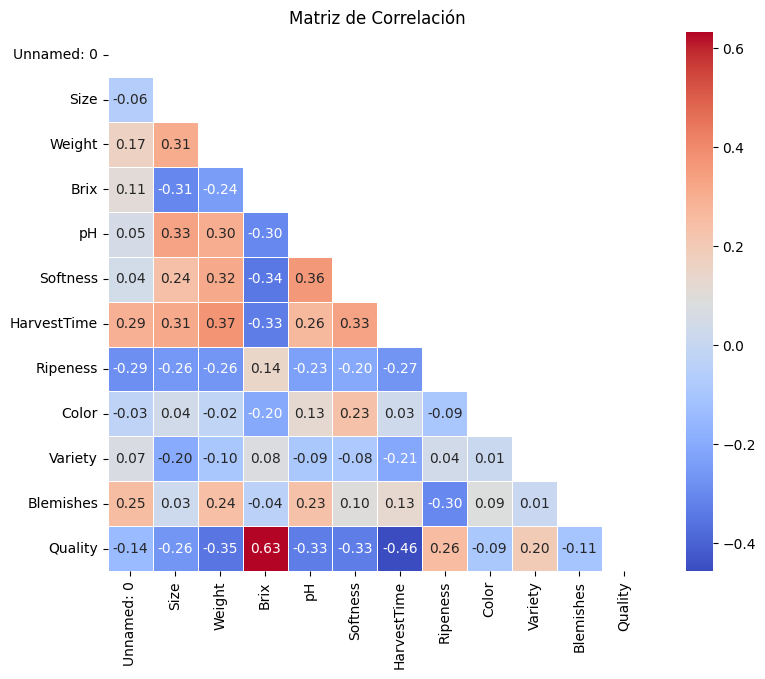

In [11]:
def identificarCorrelacion(dataset):
  f = dataset.corr()
  mask=np.triu(np.ones_like(f))
  #Ajustando el tamaño para que se vea mejor
  plt.figure(figsize=[10,7])
  sns.heatmap(f,annot=True,cmap="coolwarm",mask=mask,fmt=".2f",square=True, linewidths=.5)
  plt.title("Matriz de Correlación")
  plt.show()

identificarCorrelacion(clean_data)

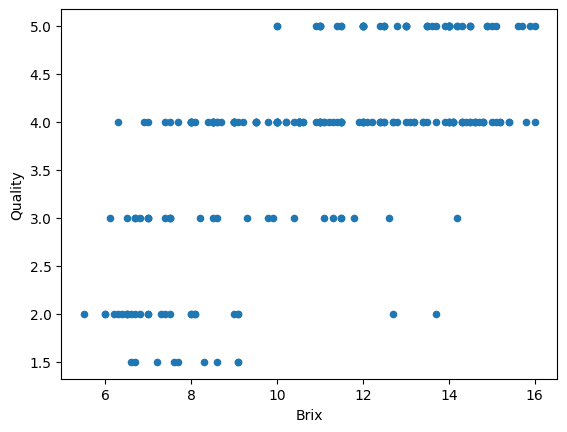

In [62]:
clean_data.plot.scatter(x="Brix",y="Quality")
plt.show()

# Separando data en
Usará Brix (nivel de dulzura), HarvestTime (días de cosecha), weight, softness y size

In [69]:
data = clean_data

x = data.drop(["Brix"],axis=1)
y=data["Quality"]

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101,test_size=0.2)

# Regresion lineal

In [80]:
modeloLR=LinearRegression().fit(x_train,y_train)
y_hatLR=modeloLR.predict(x_test)
y_hatLR

array([4. , 5. , 4. , 4. , 4. , 4. , 5. , 5. , 4. , 5. , 5. , 4. , 4. ,
       2. , 2. , 3. , 4. , 3. , 4. , 5. , 4. , 4. , 4. , 1.5, 2. , 1.5,
       4. , 1.5, 4. , 5. , 3. , 4. , 5. , 5. , 4. , 4. , 4. , 4. , 5. ,
       5. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 5. , 4. ])

In [79]:
#Obtener la ecuación de la recta
print("Ecuación de la recta: y = (",modeloLR.coef_[0],") x + (",modeloLR.intercept_,")")
#Evaluando el modelo
print(confusion_matrix(round(y_test),y_hatLR.round()))
print("\n")
print(classification_report(y_test.round(),y_hatLR.round()))

Ecuación de la recta: y = ( 6.654954188894541e-17 ) x + ( 3.1530333899354446e-14 )
[[ 0  0  0  0  0]
 [ 2  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 12]]


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.67      0.80         6
         3.0       1.00      1.00      1.00         3
         4.0       1.00      1.00      1.00        28
         5.0       1.00      1.00      1.00        12

    accuracy                           0.96        49
   macro avg       0.80      0.73      0.76        49
weighted avg       1.00      0.96      0.98        49



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM


In [78]:
svmmodel=SVC(kernel='linear',C=1000,gamma="auto",random_state=0)
#Entrenamiento del modelo
svmmodel.fit(x_train.round(),y_train.round())
#Proabndo las prediciones
y_hat=svmmodel.predict(x_test)
y_hat
#Evaluar el modelo
print(confusion_matrix(y_test.round(),y_hat.round()))
print("\n")
print(classification_report(y_test.round(),y_hat.round()))

[[ 6  0  0  0]
 [ 0  3  0  0]
 [ 0  0 28  0]
 [ 0  0  0 12]]


              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00         6
         3.0       1.00      1.00      1.00         3
         4.0       1.00      1.00      1.00        28
         5.0       1.00      1.00      1.00        12

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



# SVM 2